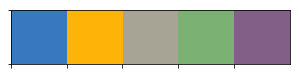

In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sb.palplot(sb.xkcd_palette(colors))

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import interp

In [63]:
df = pd.read_csv('user_base.csv')

In [64]:
df.shape

(169, 22)

In [65]:
df.head()

,Unnamed: 0,title,Author,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,...,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max,top_ref
0,0,NaN,Dovydas Reinikevicius,21000.0,0,0.819386,2.400722,19,97.200000,62,...,2400.0,0,0.484110,2.425349,12.791667,0.083333,12,74,0.0,NaN
1,12,ACompleteMachineLearningProjectWalkThroughinPy...,William Koehrsen,8900.0,1,0.204970,1.251257,14,87.352727,68,...,0.0,23,0.076845,1.429189,5.515385,0.153846,13,278,0.0,towardsdatascience.com
2,25,ACryptocoinYouWanttoSpend,REMECoin.io,7600.0,0,1.752779,7.000000,1,81.460000,171,...,1000.0,6,0.000000,1.379545,4.384615,0.461538,13,47,0.0,www.remecoin.io
3,38,AFeatureSelectionToolforMachineLearninginPython,William Koehrsen,3600.0,1,0.122830,1.143520,13,75.483333,31,...,0.0,13,0.326617,1.300244,4.500000,0.176471,17,230,0.0,github.com
4,55,AGuidetoBecomingaFullStackDeveloperin,Daniel Borowski,48000.0,5,0.527692,1.938571,25,89.186667,478,...,11400.0,14,0.254243,1.329968,4.358333,0.600000,10,53,0.0,stackoverflow.com


In [66]:
df = df.drop('Unnamed: 0',axis = 1)

In [67]:
df.describe()

,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,followinga_max,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max
count,169.000000,169.000000,169.000000,169.000000,169.000000,168.000000,169.000000,169.000000,168.000000,169.000000,169.000000,142.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0
mean,22835.982249,1.272189,0.642574,2.717522,25.976331,88.714455,146.923077,6.887574,295.386905,12808.627219,6.656805,0.330367,1.626674,7.194071,0.172123,15.047337,259.591716,0.0
std,31330.567775,1.400424,0.649072,2.876044,44.457571,20.895339,266.602701,6.453526,906.633894,38255.027702,6.854827,0.209324,0.602098,4.546299,0.140066,6.250534,310.920741,0.0
min,221.000000,0.000000,0.013805,1.014464,0.000000,33.580000,9.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.660682,2.163636,0.000000,10.000000,0.000000,0.0
25%,3800.000000,0.000000,0.153092,1.182148,4.000000,78.965000,37.000000,2.000000,0.000000,0.000000,2.000000,0.222247,1.168259,3.731818,0.066667,11.000000,45.000000,0.0
50%,10500.000000,1.000000,0.292213,1.383532,17.000000,88.358750,74.000000,5.000000,1.000000,36.000000,4.000000,0.324861,1.457610,5.093651,0.166667,13.000000,128.000000,0.0
75%,28000.000000,2.000000,0.955062,2.882547,28.000000,101.118900,137.000000,10.000000,15.250000,5700.000000,10.000000,0.453680,2.161541,10.705333,0.250000,17.000000,352.000000,0.0
max,210000.000000,5.000000,2.563903,15.000000,371.000000,162.510000,2163.000000,46.000000,7100.000000,203000.000000,52.000000,1.000000,3.053626,22.083333,0.894737,51.000000,1403.000000,0.0


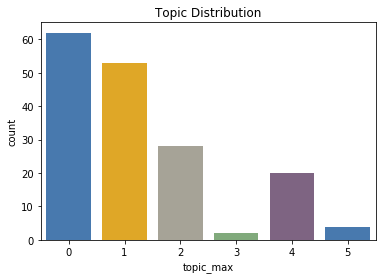

In [68]:
sb.countplot(df['topic_max'], palette = sb.xkcd_palette(colors))
plt.title("Topic Distribution")
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


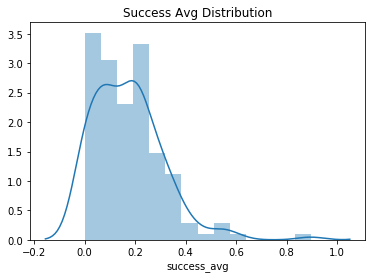

In [69]:
sb.distplot(df['success_avg'])
plt.title("Success Avg Distribution")
plt.show()

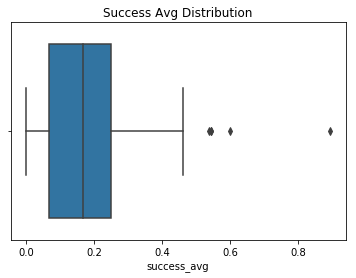

In [70]:
sb.boxplot(df['success_avg'])
plt.title("Success Avg Distribution")
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


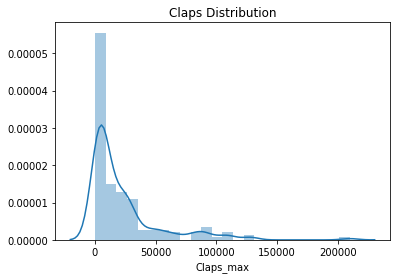

In [71]:
sb.distplot(df['Claps_max'])
plt.title("Claps Distribution")
plt.show()

In [72]:
##Decide Cut-off
cut_off = .175
df['Success']=np.where((df['success_avg']>cut_off),1,0)

In [73]:
df['Success'].value_counts()

0    86
1    83
Name: Success, dtype: int64

In [74]:
#PCA
#PCA on Country
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def create_matrix(df,row_name,col_name,value_name):
    '''Creates a matrix needed for PCA.
    Enter row_name, and col_name as strings'''
    dataframe = df[[row_name,col_name]]
    matrix = pd.pivot_table(df,index = row_name,columns = col_name,values = value_name, aggfunc=np.mean,fill_value = 0)
    #print(matrix.shape)
    #matrix = matrix.drop_duplicates()
    #print(matrix.shape)
    #print(matrix.head())
    return matrix

def standardize(matrix):
    '''Takes in a matrix and returns a standaridzed matrix.'''
    scaler = StandardScaler().fit(matrix)
    rescaled_matrix = scaler.transform(matrix)
    return rescaled_matrix

#PCA
def PCA_analysis(matrix,rescaled_matrix,n_components):
    '''Takes rescaled matrix and runs initial PCA.
    Returns final df with PCA cols'''
    pca = PCA(n_components = n_components,svd_solver = 'auto')
    fit = pca.fit(rescaled_matrix)
    d2 = pca.transform(rescaled_matrix)
    #print(np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100))
    d2_df = pd.DataFrame(d2)
    d2_df.index = pd.DataFrame(data=matrix).index
    col_headers = []
    for x in range(n_components):
        col_headers.append('PC'+str(x+1))
    d2_df.columns = col_headers
    #Plot 100 components
    pca_big = PCA(n_components=80)
    fit_big = pca_big.fit_transform(rescaled_matrix)
    var = np.cumsum(np.round(pca_big.explained_variance_ratio_,decimals=5)*100)
    #print(var)
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Features')
    plt.title('PCA Analysis')
    plt.ylim(0,100.5)
    plt.style.context('seaborn-whitegrid')
    plt.plot(var)
    return d2_df

#Put it all together
def agg_PCA(df,row_name,col_name,value_name,n_components):
    m = create_matrix(df,row_name,col_name,value_name)
    rm = standardize(m)
    df_final = PCA_analysis(m,rm,n_components)
    
    return df_final

def PCA_merge(data,pca1,pca2):
    data = pd.merge(data, pca1, how='left', left_on='artist_name', left_index=False, right_index=True)
    data = pd.merge(data, pca2, how='left', left_on='artist_name', left_index=False, right_index=True)
    return data
# call the functions
#rc_pca_df = agg_PCA(df,'Company_Name','',10)
#pl_pca_df = agg_PCA(data,'artist_name','playlist_id',20)
#data = PCA_merge(data,rc_pca_df,pl_pca_df)

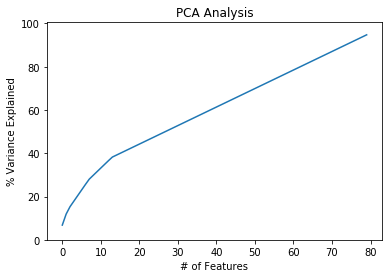

In [75]:
author_pca=agg_PCA(df,'Author','title','success_avg',10)

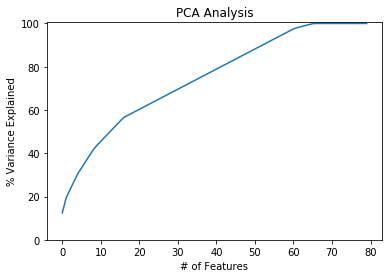

In [76]:
ref_pca=agg_PCA(df,'top_ref','title','success_avg',10)

In [77]:
data = df.merge(author_pca, left_on = 'Author',right_index = True,how = 'left')

In [78]:
data.shape

(169, 32)

In [79]:
data = data.merge(ref_pca, left_on ='top_ref',right_index = True, how = 'left')

In [80]:
data.shape

(169, 42)

In [81]:
data.columns

Index(['title', 'Author', 'Claps_max', 'topic_max', 'al_log_avg',
       'author_loyalty_avg', 'comments_max', 'complex_max', 'days_open_max',
       'figures_max', 'followinga_max', 'follwersa_max', 'ref_count_max',
       'sent_max', 'tl_log_avg', 'topic_loyalty_avg', 'success_avg',
       'success_len', 'words_max', 'title_sent_max', 'top_ref', 'Success',
       'PC1_x', 'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x',
       'PC9_x', 'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y',
       'PC7_y', 'PC8_y', 'PC9_y', 'PC10_y'],
      dtype='object')

In [82]:
data['log_claps']=data['Claps_max'].apply(np.log)

In [83]:
from sklearn.preprocessing import Imputer
data['sent_max']=data['sent_max'].fillna(0)
data['complex_max']=data['complex_max'].fillna(0)
data['followinga_max']=data['followinga_max'].fillna(0)
data['follwersa_max']=data['follwersa_max'].fillna(0)
fix = Imputer(missing_values = 0, strategy = 'median',axis = 0).fit_transform(data[['followinga_max','follwersa_max','sent_max','complex_max']])
fix = pd.DataFrame(fix,columns = ['following','followers','sent','complex'])

In [84]:
data = data.merge(fix,left_index = True, right_index = True)
data = data.drop(['followinga_max','follwersa_max','sent_max','complex_max'],axis = 1)

In [85]:
data.shape

(169, 43)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


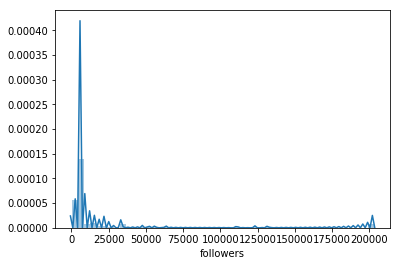

In [86]:
sb.distplot(data['followers'])

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [88]:
data=data.drop(['title_sent_max','Claps_max','author_loyalty_avg','topic_loyalty_avg'],axis = 1)

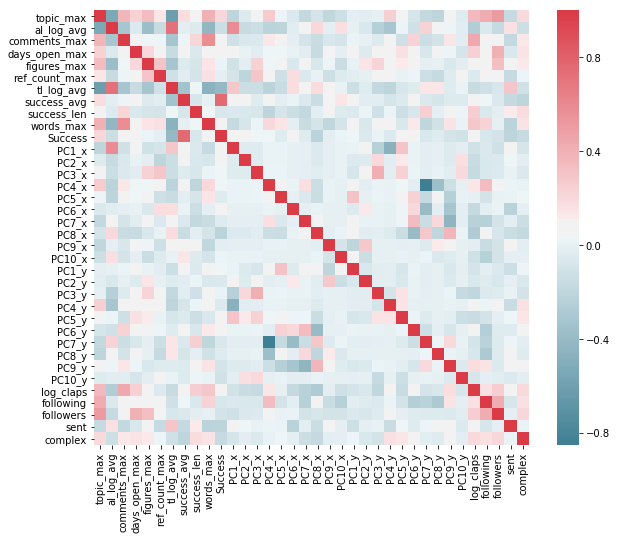

In [89]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [91]:
data = data.drop(['success_len','success_avg'],axis = 1)

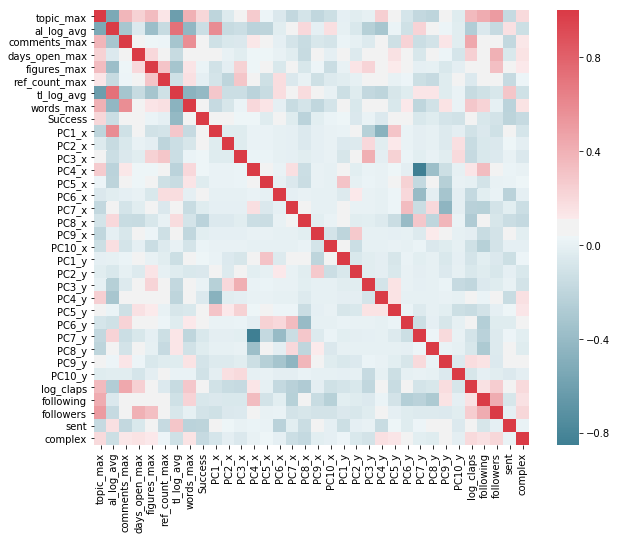

In [92]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [93]:
data.corr()

,topic_max,al_log_avg,comments_max,days_open_max,figures_max,ref_count_max,tl_log_avg,words_max,Success,PC1_x,...,PC6_y,PC7_y,PC8_y,PC9_y,PC10_y,log_claps,following,followers,sent,complex
topic_max,1.000000,-0.537069,0.374402,0.236553,0.347864,0.136281,-0.618907,0.402905,0.206908,-0.206708,...,-0.085651,-0.185641,-0.204291,0.051503,-0.038769,0.350454,0.427444,0.512639,-0.170140,0.190058
al_log_avg,-0.537069,1.000000,-0.321127,-0.054256,-0.377612,-0.159830,0.723215,-0.426276,-0.138937,0.586734,...,-0.115356,0.227832,0.084975,0.028818,-0.033034,-0.260388,-0.060319,-0.166108,0.164806,-0.134873
comments_max,0.374402,-0.321127,1.000000,0.072847,0.035903,0.025326,-0.328398,0.575735,0.087842,-0.117299,...,0.229037,-0.138817,-0.102052,0.134881,-0.030293,0.447021,0.091519,0.096896,-0.179697,0.125646
days_open_max,0.236553,-0.054256,0.072847,1.000000,0.203995,0.068101,-0.162192,0.059217,0.084665,0.052369,...,0.076046,-0.071388,0.059047,0.023747,-0.090735,0.241295,0.076142,0.400181,-0.069303,0.148993
figures_max,0.347864,-0.377612,0.035903,0.203995,1.000000,0.299851,-0.325068,0.140277,0.017165,-0.107375,...,0.055289,-0.009560,-0.003500,-0.068299,-0.012674,0.081238,0.041779,0.334018,0.057053,0.122138
ref_count_max,0.136281,-0.159830,0.025326,0.068101,0.299851,1.000000,-0.117131,0.162734,-0.011282,-0.097423,...,0.029611,-0.133423,-0.170398,-0.040567,0.090073,-0.050161,0.067428,0.085487,-0.170646,0.026825
tl_log_avg,-0.618907,0.723215,-0.328398,-0.162192,-0.325068,-0.117131,1.000000,-0.465491,-0.415253,0.286559,...,-0.037588,0.134684,0.133294,-0.040080,0.014176,-0.162208,-0.114493,-0.072927,0.292353,-0.116809
words_max,0.402905,-0.426276,0.575735,0.059217,0.140277,0.162734,-0.465491,1.000000,0.089684,-0.165254,...,0.120267,-0.199669,-0.109603,0.147874,0.010403,0.287202,0.230445,-0.004221,-0.218366,0.147316
Success,0.206908,-0.138937,0.087842,0.084665,0.017165,-0.011282,-0.415253,0.089684,1.000000,0.047759,...,0.103665,-0.064216,-0.034868,-0.093938,-0.111309,0.096559,-0.075842,-0.103917,-0.211807,-0.168421
PC1_x,-0.206708,0.586734,-0.117299,0.052369,-0.107375,-0.097423,0.286559,-0.165254,0.047759,1.000000,...,0.009153,-0.016952,-0.000743,-0.041919,-0.017089,-0.107825,-0.060774,-0.115306,0.094207,-0.085791


In [94]:
data.Success.value_counts()

0    86
1    83
Name: Success, dtype: int64

In [95]:
data.columns

Index(['title', 'Author', 'topic_max', 'al_log_avg', 'comments_max',
       'days_open_max', 'figures_max', 'ref_count_max', 'tl_log_avg',
       'words_max', 'top_ref', 'Success', 'PC1_x', 'PC2_x', 'PC3_x', 'PC4_x',
       'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x', 'PC10_x', 'PC1_y', 'PC2_y',
       'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y', 'PC8_y', 'PC9_y', 'PC10_y',
       'log_claps', 'following', 'followers', 'sent', 'complex'],
      dtype='object')

In [96]:
logs = data[['comments_max','days_open_max','figures_max','ref_count_max','words_max','followers','following','sent','complex']]
logs = (logs+0.1).apply(np.log)
logs.columns = ['l_comments','l_days','l_figs','l_ref_count','l_words','l_followers','l_following','l_sent','l_complex']
data = data.merge(logs, left_index = True, right_index = True)
data=data.drop(['comments_max','days_open_max','figures_max','ref_count_max','words_max','followers','following','sent','complex'],axis =1)
data.shape

(169, 37)

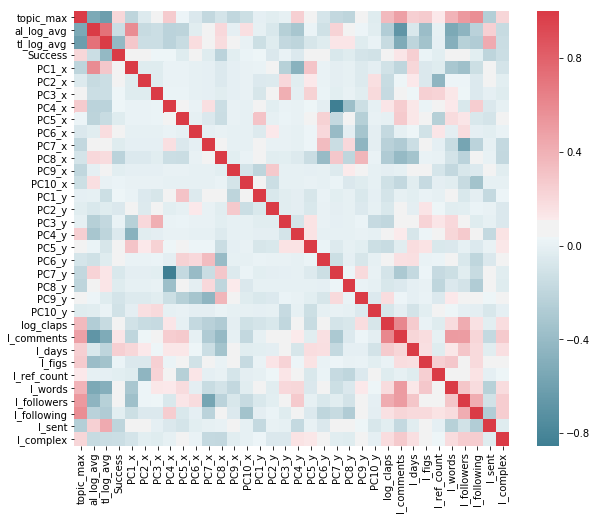

In [97]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [98]:
data.corr()

,topic_max,al_log_avg,tl_log_avg,Success,PC1_x,PC2_x,PC3_x,PC4_x,PC5_x,PC6_x,...,log_claps,l_comments,l_days,l_figs,l_ref_count,l_words,l_followers,l_following,l_sent,l_complex
topic_max,1.000000,-0.537069,-0.618907,0.206908,-0.206708,-0.043927,0.054935,0.269128,0.023906,-0.058531,...,0.350454,0.480011,0.247904,0.269241,0.120765,0.389161,0.519117,0.580363,-0.258270,0.215665
al_log_avg,-0.537069,1.000000,0.723215,-0.138937,0.586734,-0.160524,-0.139531,-0.215912,-0.214926,-0.031684,...,-0.260388,-0.681380,-0.070084,-0.386961,-0.000337,-0.537908,-0.450376,-0.226374,0.241222,-0.161902
tl_log_avg,-0.618907,0.723215,1.000000,-0.415253,0.286559,-0.142035,-0.140605,-0.221386,-0.152045,0.178966,...,-0.162208,-0.522777,-0.205466,-0.339488,-0.008608,-0.483937,-0.238056,-0.270304,0.433564,-0.146838
Success,0.206908,-0.138937,-0.415253,1.000000,0.047759,0.110173,0.032260,0.036363,-0.037288,0.055200,...,0.096559,0.134721,0.249603,0.021289,-0.023599,0.039928,0.080659,-0.025599,-0.201502,-0.137159
PC1_x,-0.206708,0.586734,0.286559,0.047759,1.000000,-0.040840,-0.035465,0.013057,0.013954,-0.000769,...,-0.107825,-0.194815,0.206427,-0.059666,-0.035110,-0.310476,-0.365601,-0.132550,0.096644,-0.094456
PC2_x,-0.043927,-0.160524,-0.142035,0.110173,-0.040840,1.000000,-0.036326,0.014357,0.015344,-0.000846,...,-0.156566,0.035642,0.123092,-0.058454,-0.443581,0.024982,0.025916,-0.054191,0.054396,-0.020459
PC3_x,0.054935,-0.139531,-0.140605,0.032260,-0.035465,-0.036326,1.000000,0.016796,0.017950,-0.000989,...,-0.166987,0.056949,0.038010,0.244998,0.228691,0.131630,0.035449,-0.052542,-0.008683,-0.035704
PC4_x,0.269128,-0.215912,-0.221386,0.036363,0.013057,0.014357,0.016796,1.000000,0.082134,0.014290,...,0.134067,0.255386,0.128607,0.018104,0.096588,0.120153,-0.069443,0.260509,-0.061513,0.000759
PC5_x,0.023906,-0.214926,-0.152045,-0.037288,0.013954,0.015344,0.017950,0.082134,1.000000,-0.004838,...,-0.005291,0.272272,0.130274,0.066915,-0.251161,0.187983,0.132580,-0.069587,-0.092593,0.049445
PC6_x,-0.058531,-0.031684,0.178966,0.055200,-0.000769,-0.000846,-0.000989,0.014290,-0.004838,1.000000,...,-0.174482,-0.003019,0.033104,-0.110131,0.136446,-0.016608,0.183133,-0.005585,-0.026167,0.012453


In [99]:
data.describe()

,topic_max,al_log_avg,tl_log_avg,Success,PC1_x,PC2_x,PC3_x,PC4_x,PC5_x,PC6_x,...,log_claps,l_comments,l_days,l_figs,l_ref_count,l_words,l_followers,l_following,l_sent,l_complex
count,169.000000,169.000000,169.000000,169.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,1.590000e+02,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,168.000000,169.000000
mean,1.272189,0.642574,1.626674,0.491124,1.091531,0.990278,0.675305,-1.512723e-01,-1.461578e-01,9.927900e-03,...,9.222968,2.031549,4.315897,1.533908,1.367746,4.672117,8.486586,2.888131,-0.877440,4.456304
std,1.400424,0.649072,0.602098,0.501407,6.218225,5.374862,4.121601,2.764213e+00,2.498993e+00,3.080041e+00,...,1.354474,2.141426,1.044026,0.975910,1.253692,1.592478,1.553403,2.066636,0.375149,0.256380
min,0.000000,0.013805,0.660682,0.000000,-0.976781,-0.621682,-0.581693,-1.110317e+01,-3.873181e+00,-8.235193e+00,...,5.398163,-2.302585,2.208274,-2.302585,-2.302585,-2.302585,3.586293,0.095310,-2.193389,3.516904
25%,0.000000,0.153092,1.168259,0.000000,-0.318197,-0.306907,-0.190173,-3.743533e-15,6.314393e-16,-1.137979e-15,...,8.242756,1.410987,3.613617,0.741937,0.741937,3.808882,8.476392,1.960095,-1.036613,4.371850
50%,1.000000,0.292213,1.457610,0.000000,-0.272298,-0.244906,-0.190173,-1.405126e-16,6.765422e-15,1.956768e-15,...,9.259131,2.839078,4.305416,1.629241,1.410987,4.852811,8.612522,2.312535,-0.850312,4.482536
75%,2.000000,0.955062,2.161541,1.000000,-0.272298,-0.244906,-0.142288,2.319325e-15,6.841749e-15,3.358425e-15,...,10.239960,3.335770,4.920711,2.312535,2.312535,5.863915,8.648239,2.714695,-0.644357,4.616260
max,5.000000,2.563903,3.053626,1.000000,28.012953,24.249520,19.799529,1.202615e+01,1.549272e+01,1.428128e+01,...,12.254863,5.916472,7.679298,3.830813,3.953165,7.246439,12.220962,8.867864,0.095310,5.091355


In [100]:
data.dtypes

title           object
Author          object
topic_max        int64
al_log_avg     float64
tl_log_avg     float64
top_ref         object
Success          int64
PC1_x          float64
PC2_x          float64
PC3_x          float64
PC4_x          float64
PC5_x          float64
PC6_x          float64
PC7_x          float64
PC8_x          float64
PC9_x          float64
PC10_x         float64
PC1_y          float64
PC2_y          float64
PC3_y          float64
PC4_y          float64
PC5_y          float64
PC6_y          float64
PC7_y          float64
PC8_y          float64
PC9_y          float64
PC10_y         float64
log_claps      float64
l_comments     float64
l_days         float64
l_figs         float64
l_ref_count    float64
l_words        float64
l_followers    float64
l_following    float64
l_sent         float64
l_complex      float64
dtype: object

In [101]:
data.isnull().sum()

title          16
Author          0
topic_max       0
al_log_avg      0
tl_log_avg      0
top_ref        14
Success         0
PC1_x          10
PC2_x          10
PC3_x          10
PC4_x          10
PC5_x          10
PC6_x          10
PC7_x          10
PC8_x          10
PC9_x          10
PC10_x         10
PC1_y          22
PC2_y          22
PC3_y          22
PC4_y          22
PC5_y          22
PC6_y          22
PC7_y          22
PC8_y          22
PC9_y          22
PC10_y         22
log_claps       0
l_comments      0
l_days          0
l_figs          0
l_ref_count     0
l_words         0
l_followers     0
l_following     0
l_sent          1
l_complex       0
dtype: int64

In [102]:
data = data.fillna(0)

In [103]:
data = data.drop(['top_ref'],axis = 1)

In [104]:
# Class balance
from sklearn.utils import resample

# succ_rat: 0.0 - 1.0
# if 0.6, 60% of final data would be succ
def up_succ(data, succ_rat):
    
    data_succ = data[data.Success == 1]
    data_not_succ = data[data.Success == 0]
    
    data_upped = resample(data_not_succ,
                         replace = True,
                         n_samples = int(0.5*(len(data_not_succ) * succ_rat) / (1 - succ_rat)))
    data_upped_ns = resample(data_succ,
                         replace = True,
                         n_samples = int(0.5*(len(data_not_succ))))
    
    data_out = pd.concat([data_upped, data_upped_ns])
    print('Upsampled data')
    print(data_out.groupby('Success')['Success'].count())
    return data_out

def dn_succ(data, succ_rat):
    
    data_succ = data[data.Success == 1]
    data_not_succ = data[data.Success == 0]
    data_downed = resample(data_not_succ,
                          replace = True,
                          n_samples = int((len(data_succ) * (1 - succ_rat))/succ_rat))
    
    data_out = pd.concat([data_succ, data_downed])
    print('\n Downsampled data')
    print(data_out.groupby('Success')['Success'].count())
    return data_out

In [105]:
us = up_succ(data,.4)
ds = dn_succ(data,.4)

Upsampled data
Success
0    28
1    43
Name: Success, dtype: int64

 Downsampled data
Success
0    124
1     83
Name: Success, dtype: int64


In [152]:
X = data.drop(['Success','title','Author'],axis = 1)
X.index = data[['title','Author']]
Y = data['Success']
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train,Y_validation=train_test_split(X,Y,test_size = validation_size, random_state = seed)

In [153]:
def get_eval_ROC(model,X,Y):
    # This will evaluate traning result
    # and present results as the ROC curve
    # X,Y from training set
    kfold = KFold(n_splits=5, random_state=7)
    base_fpr = np.linspace(0, 1, 101)
    
    title = "Model: "+ str(model).split('(')[0]
    plt.figure(figsize=(5, 5))
    plt.title(title)
    
    results = []
    X = np.array(X)
    Y = np.array(Y)
    for i, (train, test) in enumerate(kfold.split(X)):
        y_score = model.fit(X[train], Y[train]).predict_proba(X[test])
        fpr, tpr, _ = roc_curve(Y[test], y_score[:, 1])

        plt.plot(fpr, tpr, 'b', alpha=0.15)
        tpr = interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        results.append(tpr)

    results = np.array(results)
    mean_results = results.mean(axis=0)
    std = results.std(axis=0)

    res_upper = np.minimum(mean_results + std, 1)
    res_lower = mean_results - std
    print(title)
    print("ROC: %.3f (%.3f)" % (results.mean(), results.std()))
    print("True Positive Rate: %.3f , False Positive Rate: %.3f\n" % (tpr.mean(), fpr.mean()))
    plt.plot(base_fpr, mean_results, 'b')
    plt.fill_between(base_fpr, res_lower, res_upper, color='grey', alpha=0.3)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')

In [154]:
def get_val_ROC(model, train, test, y_train, y_test): 
    # make prediction and calculate the ROC
    base_fpr = np.linspace(0, 1, 101)
    title = "Model: "+ str(model).split('(')[0]
    results = []
    x_train = np.array(train)
    y_train = np.array(y_train)
    x_test = np.array(test)
    y_test = np.array(y_test)
    
    y_score = model.fit(x_train, y_train).predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    results.append(tpr)
    
    results = np.array(results)
    mean_results = results.mean(axis=0)
    std = results.std(axis=0)
    
     # plotting
    plt.figure(figsize=(5, 5))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8) #baseline
    plt.plot(*roc_curve(y_test, y_score[:,1])[:2])
    print('\n',title)
    print("ROC: %.3f (%.3f)" % (results.mean(), results.std()))
    print("True Positive Rate: %.3f , False Positive Rate: %.3f" % (tpr.mean(), fpr.mean()))
    res = results.mean()
    return res

In [207]:
def get_cm(model,x_train, y_train, x_test,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    matrix = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    print("Accuracy:"+str(accuracy))
    tn,fp,fn,tp = matrix.ravel()
    
    title = str(model).split('(')[0]
    print('Model:'+title)
    sb.set(font_scale = 1)
    sb.heatmap(matrix,annot = True, fmt = 'g', annot_kws={'size':16})

Model: LogisticRegression
ROC: 0.703 (0.271)
True Positive Rate: 0.657 , False Positive Rate: 0.457

Model: KNeighborsClassifier
ROC: 0.616 (0.286)
True Positive Rate: 0.625 , False Positive Rate: 0.520

Model: DecisionTreeClassifier
ROC: 0.772 (0.235)
True Positive Rate: 0.739 , False Positive Rate: 0.429

Model: GaussianNB
ROC: 0.682 (0.301)
True Positive Rate: 0.545 , False Positive Rate: 0.521



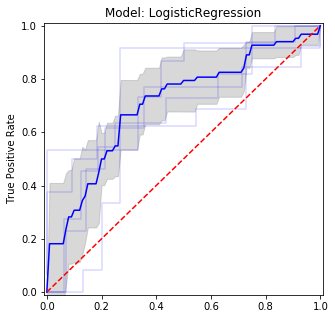

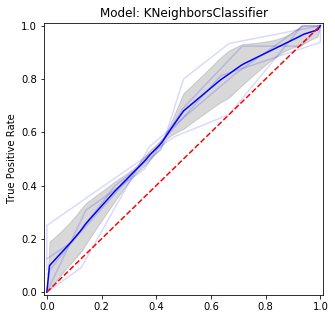

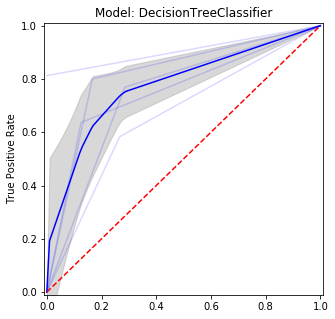

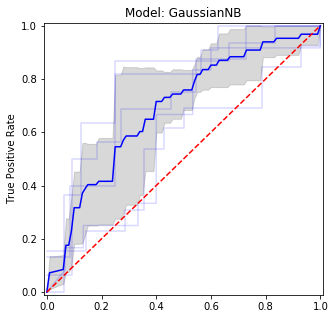

In [155]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
for name,model in models:
    get_eval_ROC(model,X_train,Y_train)


 Model: LogisticRegression
ROC: 0.667 (0.282)
True Positive Rate: 0.667 , False Positive Rate: 0.460

 Model: KNeighborsClassifier
ROC: 0.550 (0.343)
True Positive Rate: 0.550 , False Positive Rate: 0.508

 Model: DecisionTreeClassifier
ROC: 0.558 (0.290)
True Positive Rate: 0.558 , False Positive Rate: 0.481

 Model: GaussianNB
ROC: 0.692 (0.246)
True Positive Rate: 0.692 , False Positive Rate: 0.444


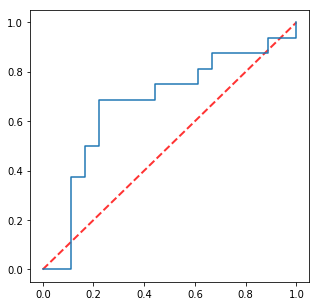

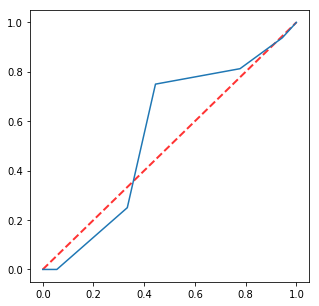

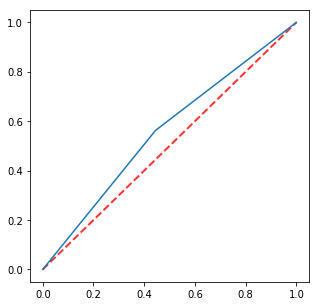

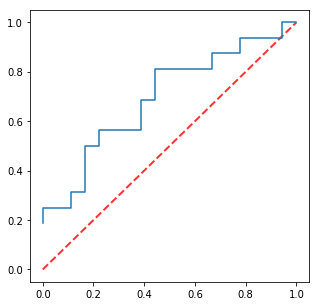

In [156]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
for name,model in models:
    get_val_ROC(model,X_train,X_validation,Y_train,Y_validation)

Model: Pipeline
ROC: 0.744 (0.260)
True Positive Rate: 0.597 , False Positive Rate: 0.452

Model: Pipeline
ROC: 0.703 (0.281)
True Positive Rate: 0.685 , False Positive Rate: 0.541

Model: Pipeline
ROC: 0.783 (0.232)
True Positive Rate: 0.742 , False Positive Rate: 0.452

Model: Pipeline
ROC: 0.682 (0.301)
True Positive Rate: 0.545 , False Positive Rate: 0.521



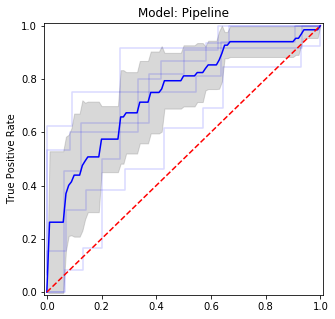

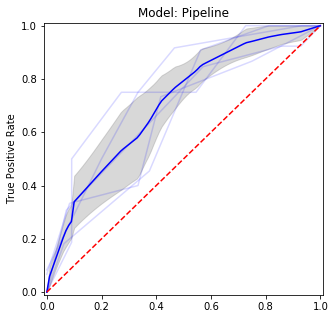

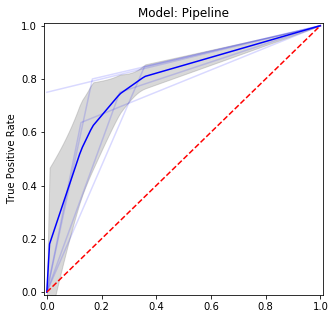

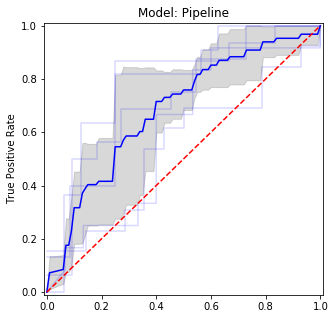

In [157]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    get_eval_ROC(model,X_train,Y_train)


Model: AdaBoostClassifier
ROC: 0.802 (0.261)
True Positive Rate: 0.695 , False Positive Rate: 0.495

Model: GradientBoostingClassifier
ROC: 0.837 (0.220)
True Positive Rate: 0.779 , False Positive Rate: 0.390

Model: RandomForestClassifier
ROC: 0.781 (0.227)
True Positive Rate: 0.780 , False Positive Rate: 0.365

Model: ExtraTreesClassifier
ROC: 0.759 (0.258)
True Positive Rate: 0.697 , False Positive Rate: 0.400



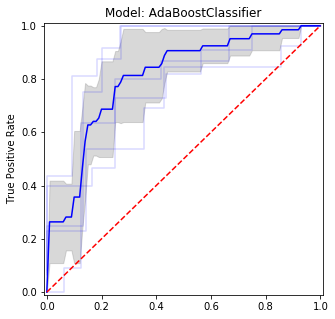

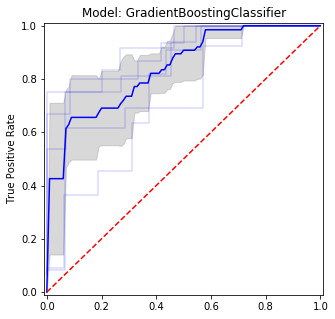

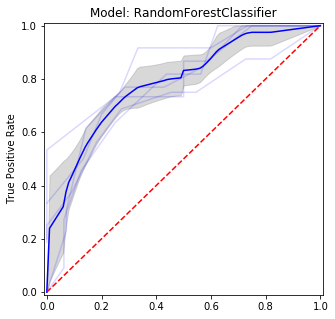

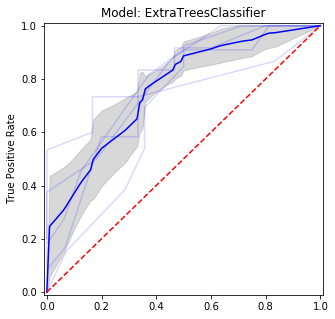

In [158]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    get_eval_ROC(model,X_train,Y_train)


 Model: AdaBoostClassifier
ROC: 0.600 (0.312)
True Positive Rate: 0.600 , False Positive Rate: 0.466

 Model: GradientBoostingClassifier
ROC: 0.658 (0.351)
True Positive Rate: 0.658 , False Positive Rate: 0.463

 Model: RandomForestClassifier
ROC: 0.627 (0.332)
True Positive Rate: 0.627 , False Positive Rate: 0.477

 Model: ExtraTreesClassifier
ROC: 0.718 (0.302)
True Positive Rate: 0.718 , False Positive Rate: 0.419


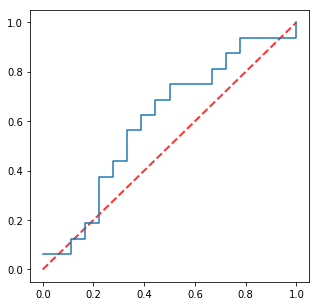

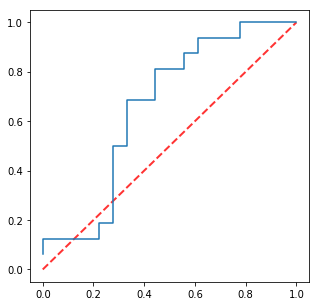

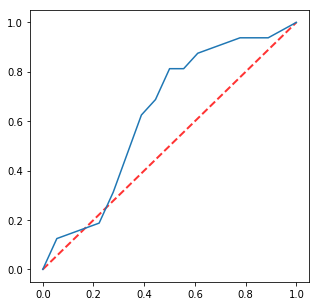

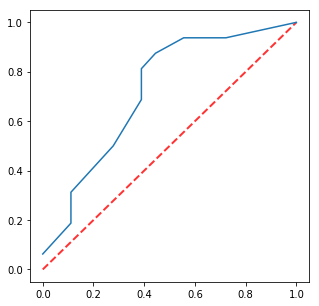

In [159]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    get_val_ROC(model,X_train,X_validation,Y_train,Y_validation)

In [160]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
def knngridsearch(range_max,X,Y):
    # define the parameter values that should be searched
    # for python 2, k_range = range(1, 31)
    k_range = list(range(1, range_max))
    print(k_range)
    # create a parameter grid: map the parameter names to the values that should be searched
    # simply a python dictionary
    # key: parameter name
    # value: list of values that should be searched for that parameter
    # single key-value pair for param_grid
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    # instantiate the grid
    knn = KNeighborsClassifier(n_neighbors = 5)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
    # fit the grid with data
    grid.fit(X, Y)
    grid.grid_scores_
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    plt.plot(k_range,grid_mean_scores)
    plt.xlabel('Value for K for KNN')
    plt.ylabel('Cross-Validated Accuracy') 
    print('Best params: ', grid.best_params_)
    print('Best score: ', grid.best_score_)
    return grid.best_estimator_

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
[0.517636684303351, 0.5541446208112875, 0.6141975308641976, 0.612257495590829, 0.6452380952380953, 0.6351851851851851, 0.642768959435626, 0.6693121693121693, 0.6515873015873015, 0.6347442680776014, 0.632010582010582, 0.647089947089947, 0.6533509700176368, 0.6603174603174603]
Best params:  {'n_neighbors': 8}
Best score:  0.6693121693121693
Model: KNeighborsClassifier
ROC: 0.631 (0.307)
True Positive Rate: 0.566 , False Positive Rate: 0.493



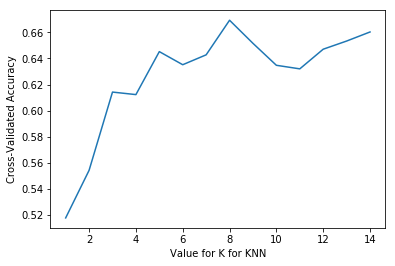

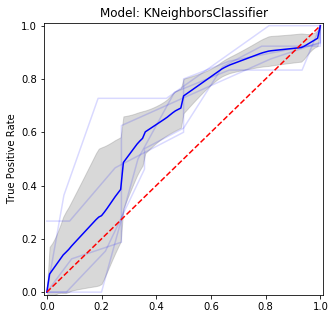

In [161]:
get_eval_ROC(knngridsearch(15,X_train,Y_train),X_train,Y_train)

In [162]:
def randomforestgrid(X,Y):
    rfc = RandomForestClassifier() 
    # Use a grid over parameters of interest
    param_grid = { 
               "n_estimators" : [9, 18, 20],
               "max_depth" : [1, 5, 10, 15],
               "min_samples_leaf" : [1, 2, 4]} 
    print('\n-------------------------')
    print('Starting grid search')
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring='roc_auc')
    print('fitting')
    CV_rfc.fit(X, Y)
    print('grid search done')
    print('Best params: ', CV_rfc.best_params_)
    print('Best score: ', CV_rfc.best_score_)
    return CV_rfc.best_estimator_


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 20}
Best score:  0.8347442680776014
Model: RandomForestClassifier
ROC: 0.770 (0.239)
True Positive Rate: 0.642 , False Positive Rate: 0.456



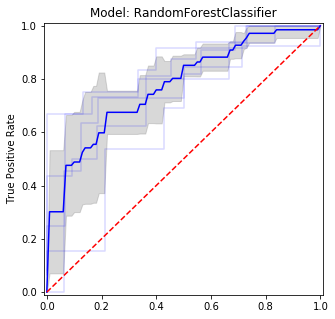

In [163]:
get_eval_ROC(randomforestgrid(X_train,Y_train),X_train,Y_train)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 18}
Best score:  0.838447971781305

 Model: RandomForestClassifier
ROC: 0.713 (0.329)
True Positive Rate: 0.713 , False Positive Rate: 0.359


0.7128712871287128

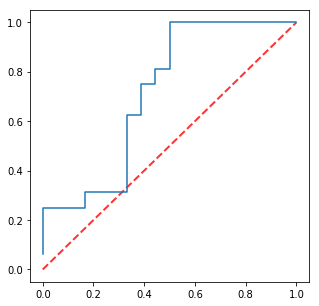

In [164]:
get_val_ROC(randomforestgrid(X_train,Y_train),X_train,X_validation,Y_train,Y_validation)

In [165]:
def select_features(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    clf = ExtraTreesClassifier()
    clf = clf.fit(X, y)
    print(clf.feature_importances_ )
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [166]:
def select_features_rf(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    rf = RandomForestClassifier()
    rf = rf.fit(X, y)
    print(rf.feature_importances_ )
    model = SelectFromModel(rf, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [167]:
def select_features_lr(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    lr = LogisticRegression()
    lr = lr.fit(X, y)
    print(lr.coef_ )
    model = SelectFromModel(lr, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [168]:
def select_features_gb(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    lr = GradientBoostingClassifier()
    lr = lr.fit(X, y)
    print(lr.feature_importances_)
    model = SelectFromModel(lr, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [169]:
X_new = select_features(X_train,Y_train)

previous shape:  (135, 33)
[0.02883972 0.04153769 0.17362385 0.02576759 0.01890373 0.02626912
 0.00443293 0.00928631 0.00157563 0.00834071 0.03783356 0.01297254
 0.01159421 0.0196413  0.02836858 0.00876706 0.00292251 0.02214645
 0.00376036 0.00551677 0.00182593 0.02556886 0.01737828 0.0395723
 0.05738521 0.07303054 0.04187182 0.03316389 0.05069256 0.04555027
 0.03909596 0.03339603 0.04936775]
new shape:  (135, 13)
Index(['al_log_avg', 'tl_log_avg', 'PC8_x', 'log_claps', 'l_comments',
       'l_days', 'l_figs', 'l_ref_count', 'l_words', 'l_followers',
       'l_following', 'l_sent', 'l_complex'],
      dtype='object')
[False  True  True False False False False False False False  True False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True]


In [170]:
X_new_rf=select_features_rf(X_train,Y_train)

previous shape:  (135, 33)
[0.02492204 0.06650363 0.18527497 0.01425167 0.01774173 0.03024514
 0.00412724 0.00271769 0.         0.00200714 0.06373709 0.00415267
 0.00486428 0.02359331 0.02666824 0.00820085 0.00258544 0.01872044
 0.00201746 0.00175936 0.         0.02802294 0.00833509 0.03571653
 0.0320289  0.09584747 0.03069898 0.04953862 0.04927871 0.05724629
 0.0283329  0.05936967 0.0214935 ]
new shape:  (135, 11)
Index(['al_log_avg', 'tl_log_avg', 'PC8_x', 'log_claps', 'l_comments',
       'l_days', 'l_figs', 'l_ref_count', 'l_words', 'l_followers', 'l_sent'],
      dtype='object')
[False  True  True False False False False False False False  True False
 False False False False False False False False False False False  True
  True  True  True  True  True  True False  True False]


In [171]:
X_new_lr = select_features_lr(X_train,Y_train)

previous shape:  (135, 33)
[[ 0.05710938 -0.01493767 -2.73623101  0.05102462  0.01953627  0.07563708
  -0.21032587 -0.56697277  0.4342734  -0.58414525 -0.90075789  0.06392765
  -0.2352954  -0.00447566 -0.04106272 -0.05249932  0.02507611 -0.04222853
  -0.21459312  0.11036843 -0.18243669  0.09246752 -0.11435009  0.28326022
  -0.25945648  0.92896703 -0.43124801  0.04650179 -0.08894644  0.26134827
  -0.46286594 -0.62259827 -0.57954531]]
new shape:  (135, 10)
Index(['tl_log_avg', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'l_days', 'l_figs',
       'l_following', 'l_sent', 'l_complex'],
      dtype='object')
[False False  True False False False False  True  True  True  True False
 False False False False False False False False False False False False
 False  True  True False False False  True  True  True]


In [172]:
X_new_gb = select_features_gb(X_train,Y_train)

previous shape:  (135, 33)
[1.84802812e-03 1.09532188e-01 1.68625052e-01 3.62268871e-03
 4.86382061e-03 5.63194476e-03 6.01953374e-05 1.84875919e-02
 6.11359818e-05 6.48001035e-05 4.53602065e-02 0.00000000e+00
 1.60854910e-02 3.53801117e-03 4.39701121e-03 1.91683537e-02
 2.93979856e-03 5.23116849e-03 1.19775120e-03 0.00000000e+00
 0.00000000e+00 2.95718616e-03 1.09798045e-02 8.10767317e-02
 4.10052765e-02 1.35788362e-01 2.73861537e-02 2.00533741e-02
 4.23714732e-02 5.55408544e-02 1.97484875e-02 8.06334596e-02
 7.17435991e-02]
new shape:  (135, 10)
Index(['al_log_avg', 'tl_log_avg', 'PC8_x', 'log_claps', 'l_comments',
       'l_days', 'l_words', 'l_followers', 'l_sent', 'l_complex'],
      dtype='object')
[False  True  True False False False False False False False  True False
 False False False False False False False False False False False  True
  True  True False False  True  True False  True  True]


In [173]:
X_new_t = X_train[['al_log_avg','tl_log_avg','log_claps','l_days','l_words','l_followers','l_sent','l_complex','PC8_x','l_comments','PC3_y',
                  'l_following','l_figs','l_ref_count']]
X_new_v = X_validation[['al_log_avg','tl_log_avg','log_claps','l_days','l_words','l_followers','l_sent','l_complex','PC8_x','l_comments','PC3_y',
                  'l_following','l_figs','l_ref_count']]

Model: LogisticRegression
ROC: 0.803 (0.206)
True Positive Rate: 0.765 , False Positive Rate: 0.400

Model: KNeighborsClassifier
ROC: 0.660 (0.276)
True Positive Rate: 0.609 , False Positive Rate: 0.541

Model: DecisionTreeClassifier
ROC: 0.755 (0.251)
True Positive Rate: 0.739 , False Positive Rate: 0.429

Model: GaussianNB
ROC: 0.730 (0.285)
True Positive Rate: 0.631 , False Positive Rate: 0.401



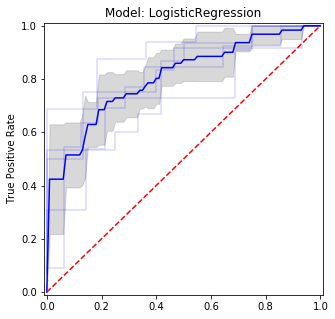

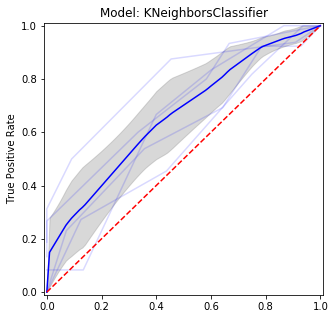

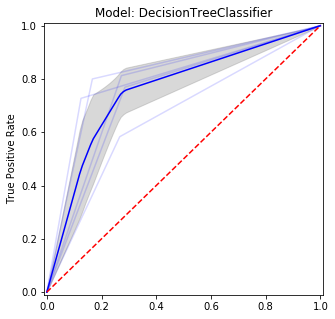

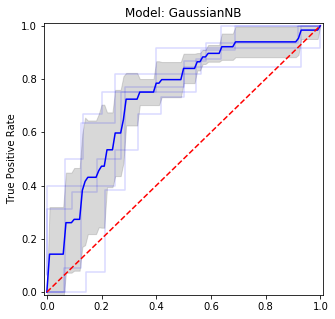

In [174]:
for name, model in models:
    get_eval_ROC(model,X_new_t,Y_train)

Model: Pipeline
ROC: 0.809 (0.236)
True Positive Rate: 0.657 , False Positive Rate: 0.459

Model: Pipeline
ROC: 0.700 (0.231)
True Positive Rate: 0.753 , False Positive Rate: 0.595

Model: Pipeline
ROC: 0.797 (0.236)
True Positive Rate: 0.739 , False Positive Rate: 0.429

Model: Pipeline
ROC: 0.730 (0.285)
True Positive Rate: 0.631 , False Positive Rate: 0.401



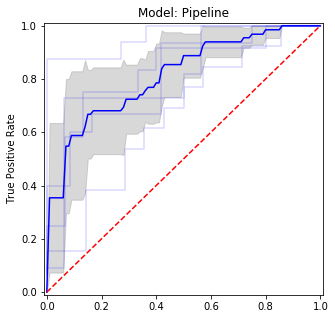

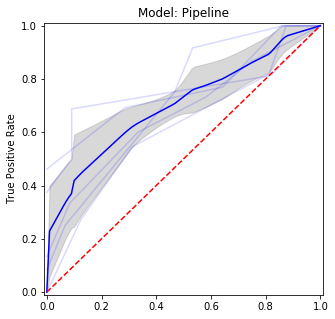

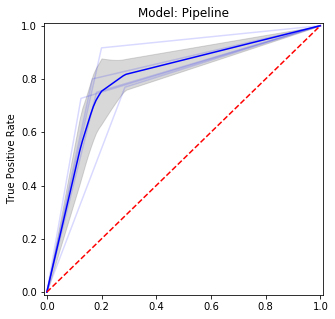

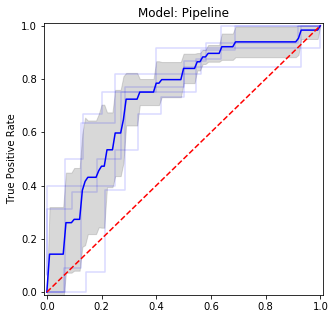

In [175]:
for name, model in pipelines:
    get_eval_ROC(model,X_new_t,Y_train)

Model: AdaBoostClassifier
ROC: 0.772 (0.271)
True Positive Rate: 0.625 , False Positive Rate: 0.467

Model: GradientBoostingClassifier
ROC: 0.828 (0.238)
True Positive Rate: 0.784 , False Positive Rate: 0.333

Model: RandomForestClassifier
ROC: 0.763 (0.252)
True Positive Rate: 0.687 , False Positive Rate: 0.524

Model: ExtraTreesClassifier
ROC: 0.783 (0.233)
True Positive Rate: 0.771 , False Positive Rate: 0.469



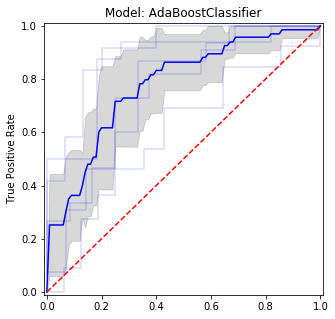

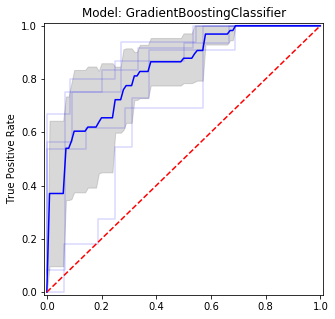

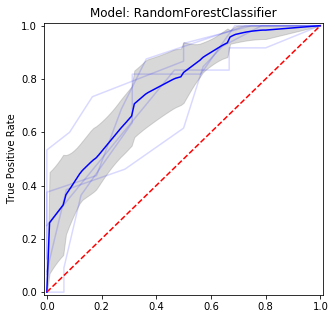

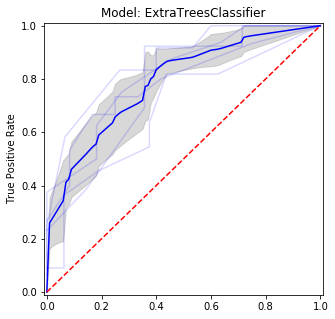

In [176]:
for name, model in ensembles:
    get_eval_ROC(model,X_new_t,Y_train)


 Model: AdaBoostClassifier
ROC: 0.575 (0.313)
True Positive Rate: 0.575 , False Positive Rate: 0.495

 Model: GradientBoostingClassifier
ROC: 0.637 (0.359)
True Positive Rate: 0.637 , False Positive Rate: 0.426

 Model: RandomForestClassifier
ROC: 0.720 (0.253)
True Positive Rate: 0.720 , False Positive Rate: 0.382

 Model: ExtraTreesClassifier
ROC: 0.689 (0.238)
True Positive Rate: 0.689 , False Positive Rate: 0.455


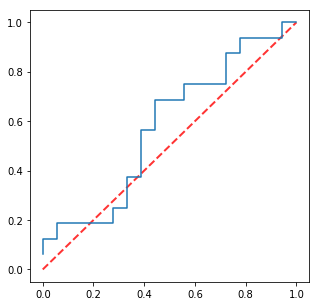

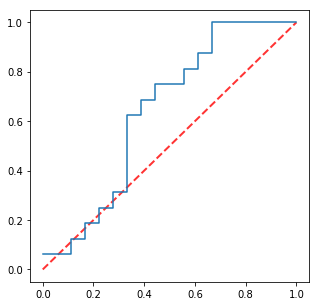

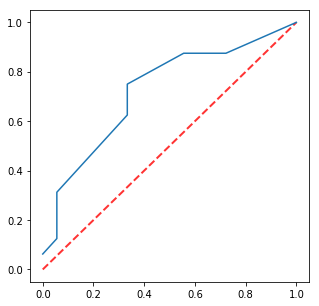

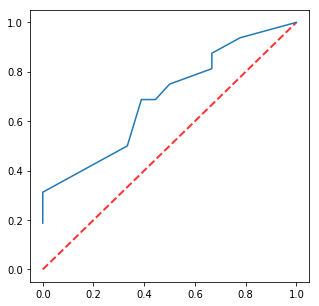

In [180]:
for name, model in ensembles:
    get_val_ROC(model,X_new_t,X_new_v,Y_train,Y_validation)


 Model: GradientBoostingClassifier
ROC: 0.635 (0.361)
True Positive Rate: 0.635 , False Positive Rate: 0.400


0.6349009900990099

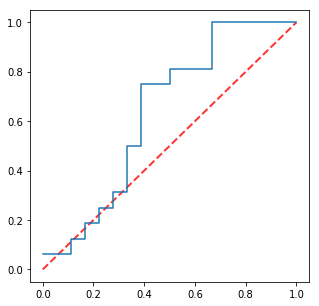

In [181]:
get_val_ROC(GradientBoostingClassifier(),X_new_t,X_new_v,Y_train,Y_validation)

Accuracy:0.6176470588235294
Model:GradientBoostingClassifier


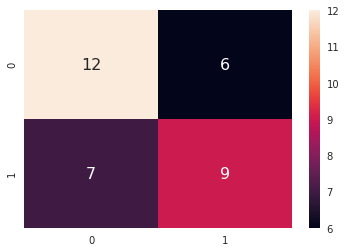

In [210]:
get_cm(GradientBoostingClassifier(),X_new_t,Y_train,X_new_v,Y_validation)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 1, 'min_samples_leaf': 4, 'n_estimators': 18}
Best score:  0.846384479717813
Model: RandomForestClassifier
ROC: 0.790 (0.198)
True Positive Rate: 0.708 , False Positive Rate: 0.454



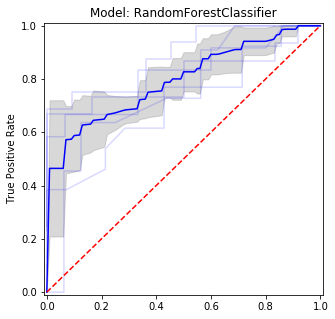

In [178]:
get_eval_ROC(randomforestgrid(X_new_t,Y_train),X_new_t,Y_train)


 Model: RandomForestClassifier
ROC: 0.615 (0.275)
True Positive Rate: 0.615 , False Positive Rate: 0.506


0.6154393564356435

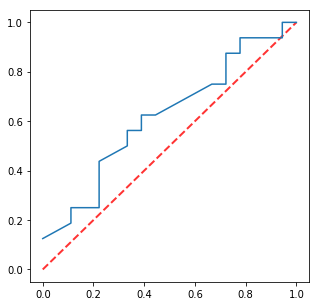

In [182]:
get_val_ROC(RandomForestClassifier(max_depth = 1,min_samples_leaf = 4,n_estimators = 18),X_new_t,X_new_v,Y_train,Y_validation)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 20}
Best score:  0.8493827160493828

 Model: RandomForestClassifier
ROC: 0.655 (0.283)
True Positive Rate: 0.655 , False Positive Rate: 0.396


0.6553217821782178

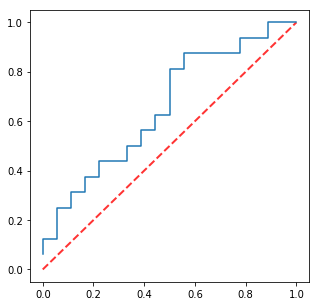

In [179]:
get_val_ROC(randomforestgrid(X_new_t,Y_train),X_new_t,X_new_v,Y_train,Y_validation)

Model: RandomForestClassifier
ROC: 0.808 (0.230)
True Positive Rate: 0.792 , False Positive Rate: 0.396



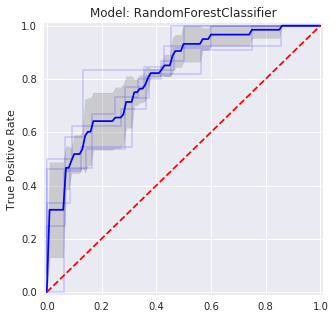

In [222]:
get_eval_ROC(RandomForestClassifier(max_depth = 5,min_samples_leaf = 2,n_estimators = 20),X_new_t,Y_train)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 18}
Best score:  0.8518518518518519
Accuracy:0.5588235294117647
Model:RandomForestClassifier


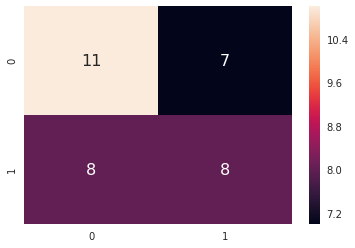

In [211]:
get_cm(randomforestgrid(X_new_t,Y_train),X_new_t,Y_train,X_new_v,Y_validation)

In [183]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 1,min_samples_leaf = 4,n_estimators = 18).fit(X_new_t,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_new_t)
shap_values = explainer.shap_values(X_new_v)

Using 135 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 34/34 [04:23<00:00,  7.75s/it]


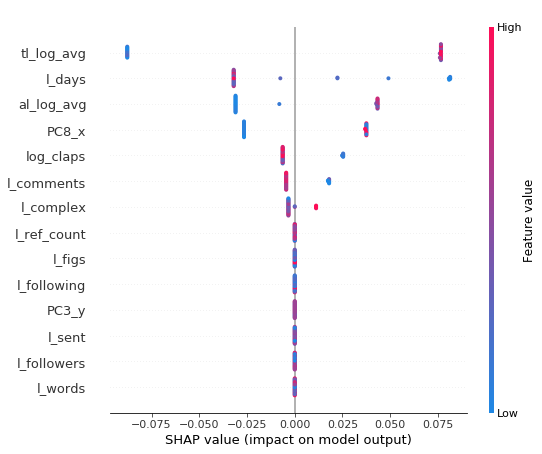

In [184]:
shap.summary_plot(shap_values[0],X_new_v)

In [185]:
shap_values = shap.TreeExplainer(rf).shap_values(X_new_t)


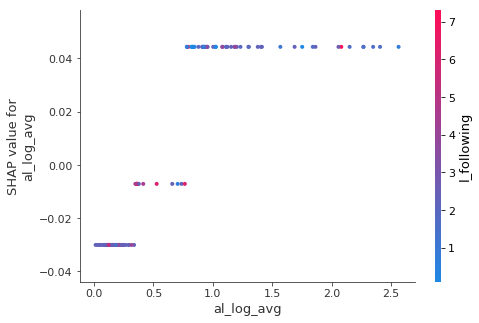

In [186]:
shap.dependence_plot("al_log_avg", shap_values[0], X_new_t)


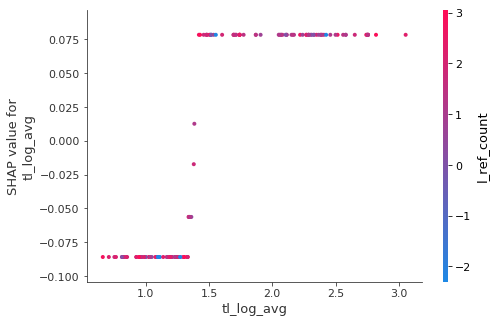

In [187]:
shap.dependence_plot("tl_log_avg", shap_values[0], X_new_t)


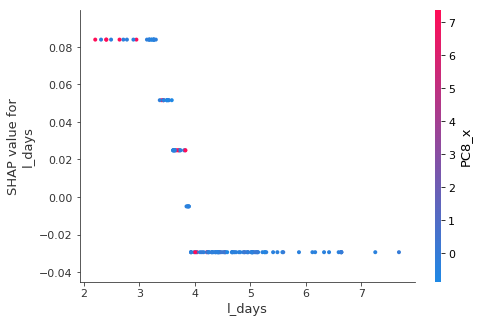

In [189]:
shap.dependence_plot("l_days", shap_values[0], X_new_t)


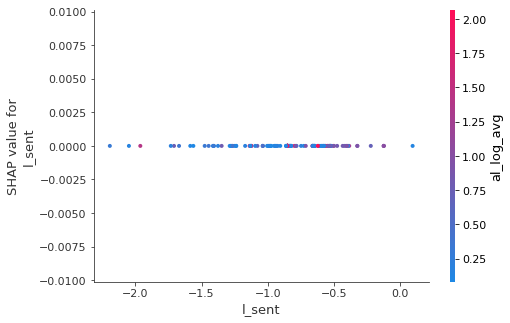

In [190]:
shap.dependence_plot("l_sent", shap_values[0], X_new_t)


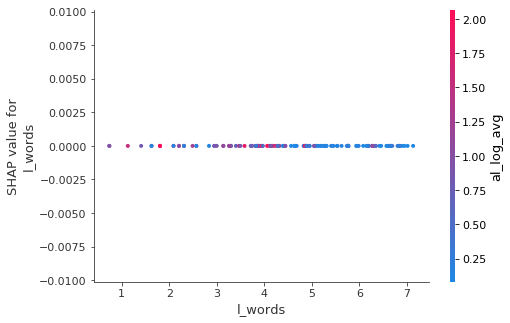

In [191]:
shap.dependence_plot("l_words", shap_values[0], X_new_t)


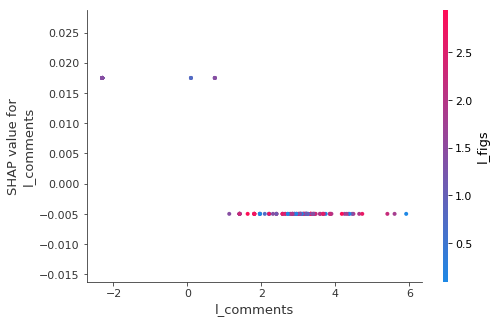

In [192]:
shap.dependence_plot("l_comments", shap_values[0], X_new_t)


In [193]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_new_t.iloc[0,:])

In [194]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_new_t)


In [195]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_new_t)

In [ ]:
lr = LogisticRegression().fit(X_new_t,Y_train)
pred = lr.predict(X_new_v)
accuracy = accuracy_score(Y_validation,pred)
print(accuracy)

In [ ]:
get_val_ROC(LogisticRegression(),X_new_t,X_new_v,Y_train,Y_validation)

In [ ]:
lr.coef_

In [ ]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, n_estimators = 9).fit(X_train,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_train)
shap_values = explainer.shap_values(X_validation)

In [ ]:
shap.summary_plot(shap_values[0],X_validation)

In [ ]:
get_val_ROC(rf,X_train, X_validation, Y_train, Y_validation)

In [ ]:
X_train.columns

In [ ]:
shap.dependence_plot("topic_max", shap_values[0], X_validation)


In [ ]:
shap.dependence_plot("al_log_avg", shap_values[0], X_validation)


In [ ]:
shap.dependence_plot("tl_log_avg", shap_values[0], X_validation)


In [ ]:
shap.dependence_plot("l_figs", shap_values[0], X_validation)


In [ ]:
shap.dependence_plot("l_complex", shap_values[0], X_validation)


In [ ]:
shap.dependence_plot("l_words", shap_values[0], X_validation)


In [ ]:
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X_train)


In [ ]:
shap.summary_plot(shap_interaction_values[0], X_train)


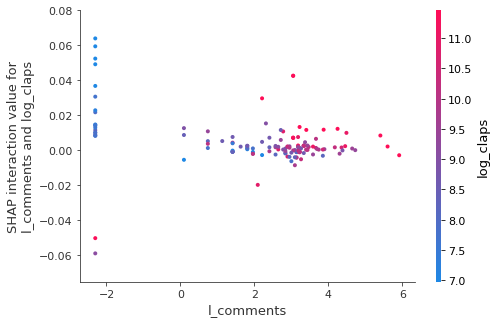

In [197]:
shap.dependence_plot(
    ("l_comments", "log_claps"),
    shap_interaction_values[0], X_new_t
)

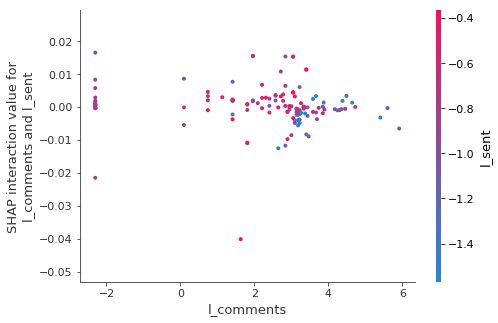

In [198]:
shap.dependence_plot(
    ("l_comments", "l_sent"),
    shap_interaction_values[0], X_new_t
)

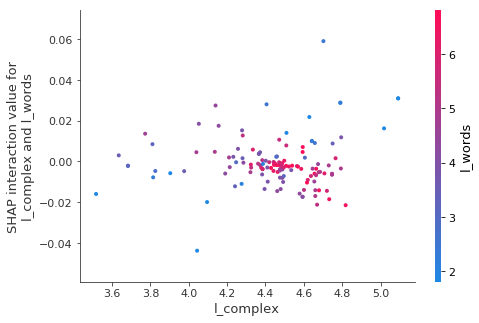

In [200]:
shap.dependence_plot(
    ("l_complex", "l_words"),
    shap_interaction_values[0], X_new_t
)

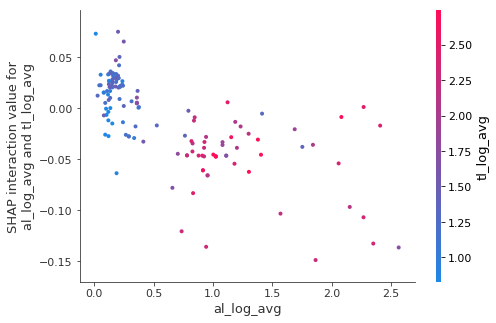

In [201]:
shap.dependence_plot(
    ("al_log_avg", "tl_log_avg"),
    shap_interaction_values[0], X_new_t
)

Could not find feature named: topic_max


ValueError: c of shape (135,) not acceptable as a color sequence for x with size 1890, y with size 1890

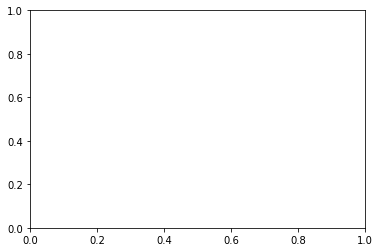

In [202]:
shap.dependence_plot(
    ("topic_max", "l_complex"),
    shap_interaction_values[0], X_new_t
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "l_words"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "l_comments"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "l_sent"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "tl_log_avg"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "al_log_avg"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "l_days"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "PC3_x"),
    shap_interaction_values[0], X_train
)

In [ ]:
shap.dependence_plot(
    ("topic_max", "PC9_x"),
    shap_interaction_values[0], X_train
)

In [ ]:
X_validation.columns

In [212]:
X_total = X_new_t.append(X_new_v,ignore_index = True)
Y_total = Y_train.append(Y_validation, ignore_index = True)

Model: RandomForestClassifier
ROC: 0.777 (0.253)
True Positive Rate: 0.666 , False Positive Rate: 0.397



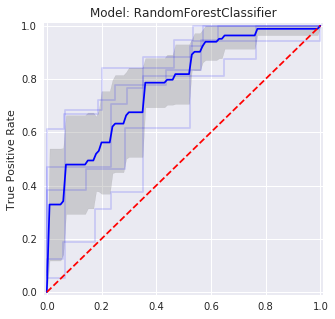

In [213]:
model = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, n_estimators=20)
get_eval_ROC(model,X_total,Y_total)

In [220]:
model.score(X_total,Y_total)

0.9112426035502958

In [214]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15,min_samples_leaf = 2, n_estimators = 9).fit(X_total,Y_total)
explainer = shap.KernelExplainer(rf.predict_proba,X_total)
shap_values = explainer.shap_values(X_total)

Using 169 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 169/169 [26:43<00:00,  9.49s/it]


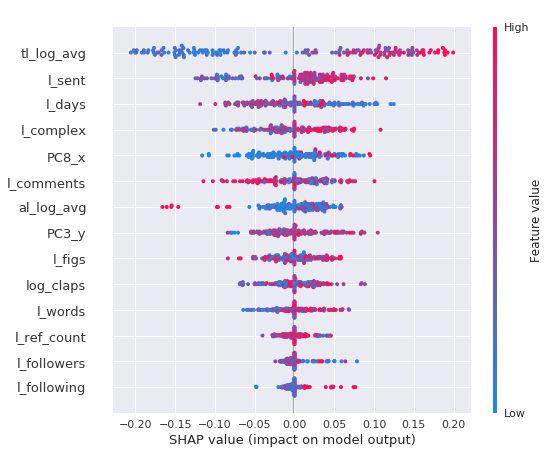

In [215]:
shap.summary_plot(shap_values[0],X_total)

In [216]:
shap_values = shap.TreeExplainer(rf).shap_values(X_total)


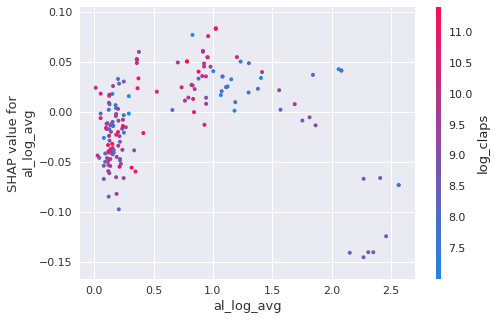

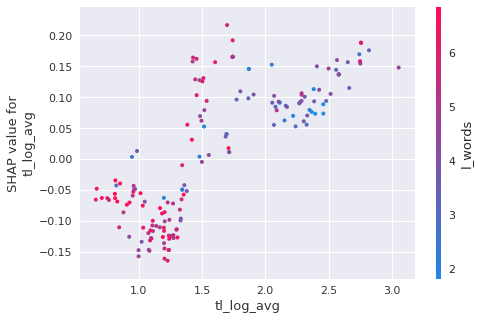

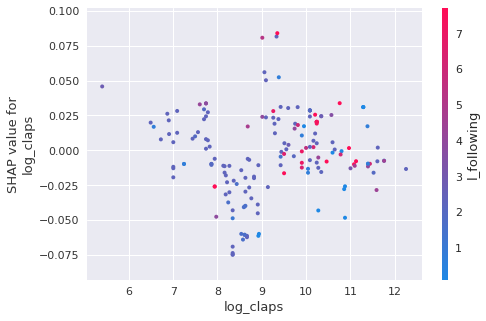

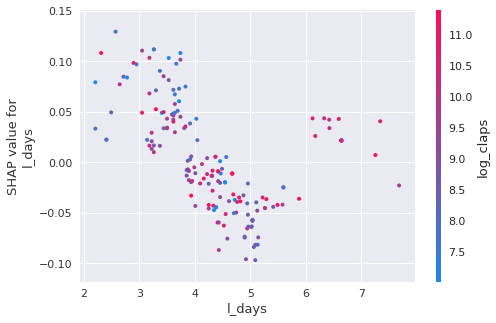

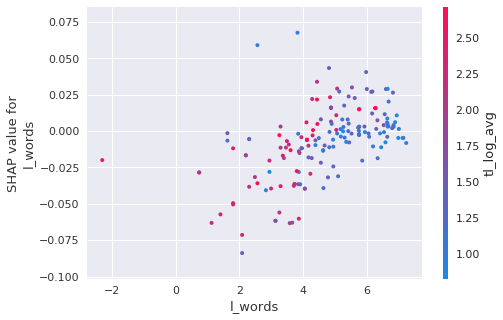

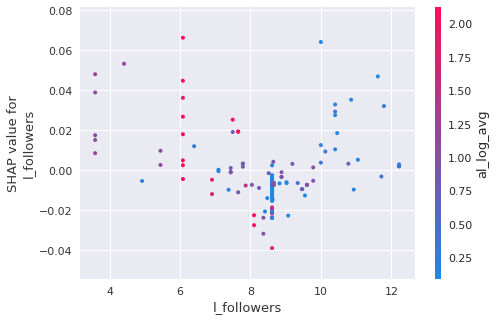

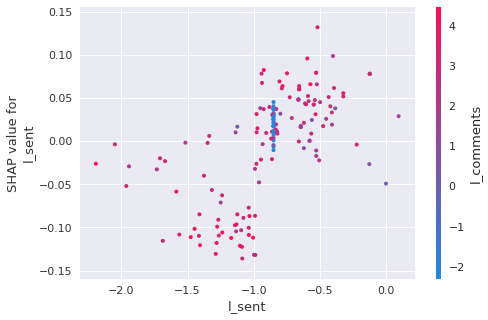

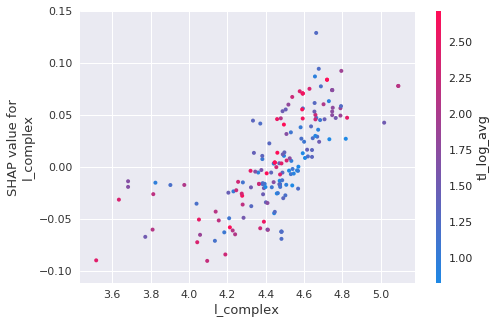

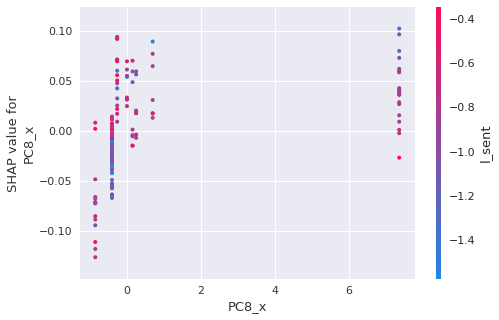

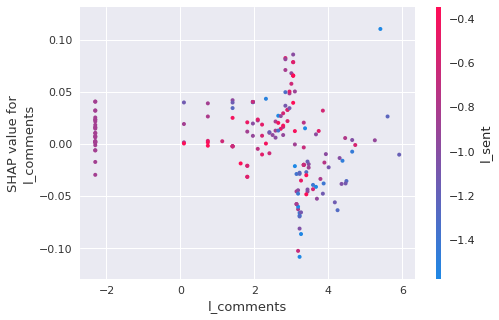

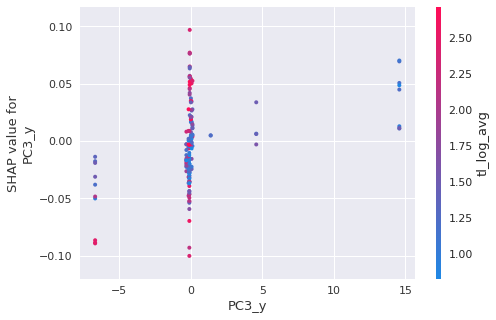

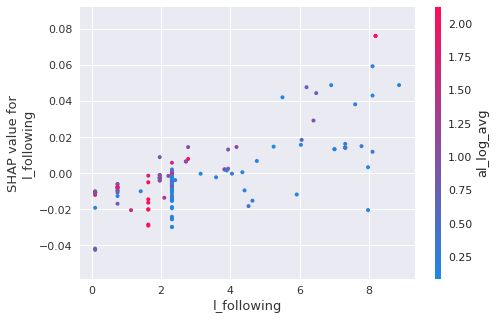

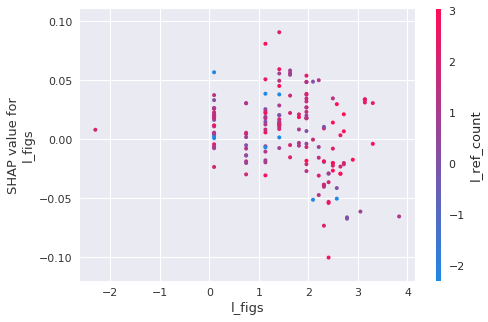

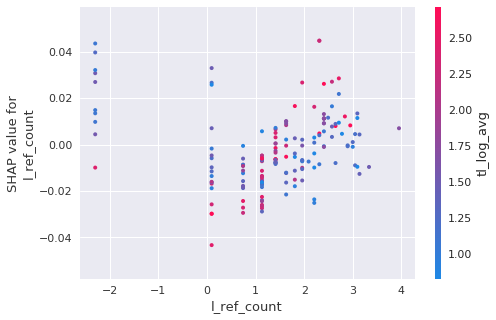

In [217]:
for x in X_total.columns:
    shap.dependence_plot(x, shap_values[0], X_total)


In [224]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15,min_samples_leaf = 2, n_estimators = 9).fit(X_new_t,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_new_t)
shap_values = explainer.shap_values(X_new_v)

Using 135 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 34/34 [04:17<00:00,  7.57s/it]


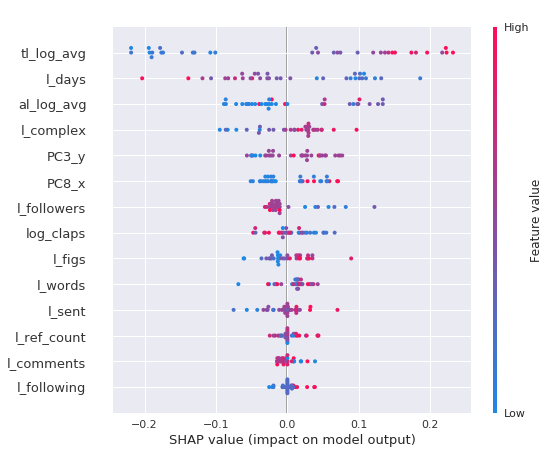

In [225]:
shap.summary_plot(shap_values[0],X_new_v)

In [226]:
shap_values = shap.TreeExplainer(rf).shap_values(X_new_t)


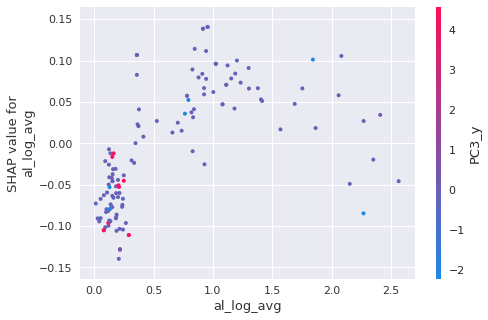

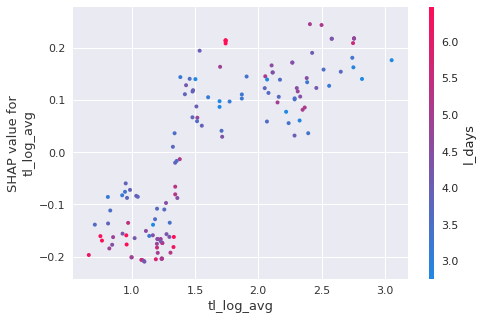

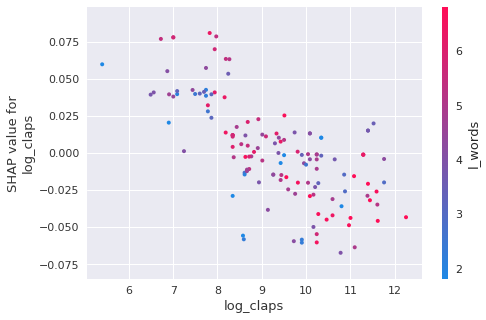

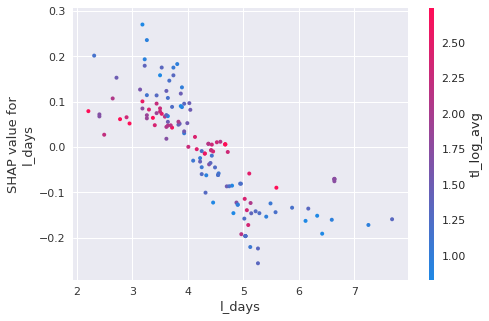

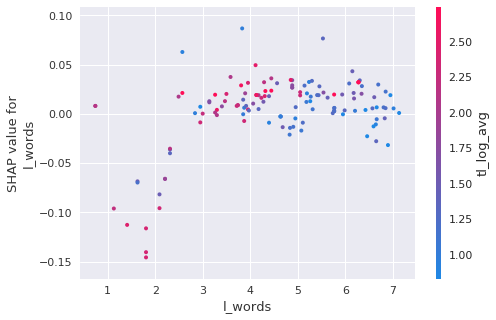

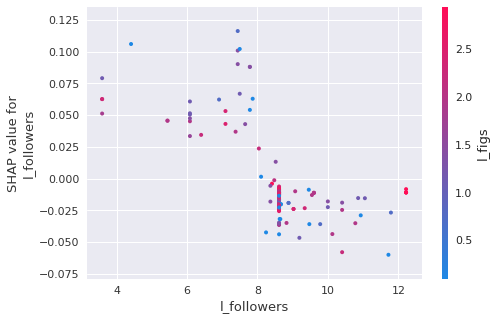

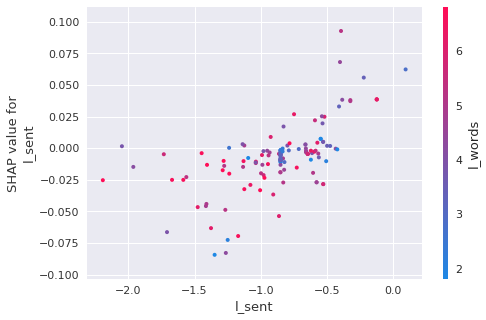

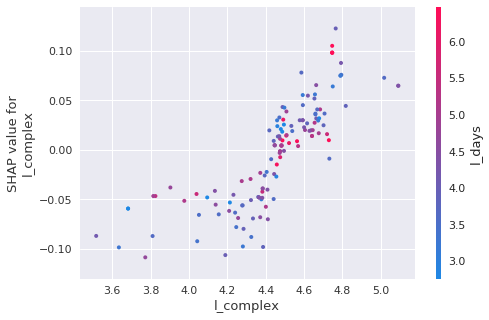

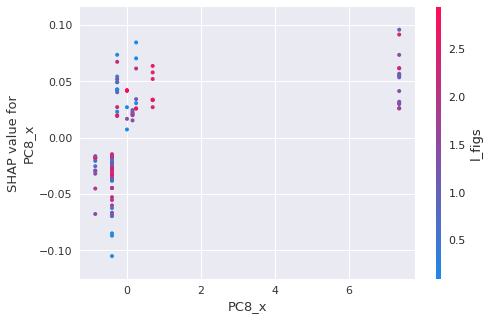

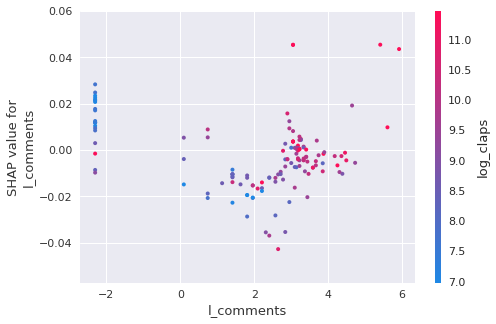

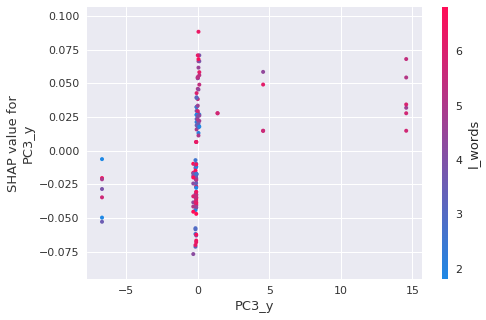

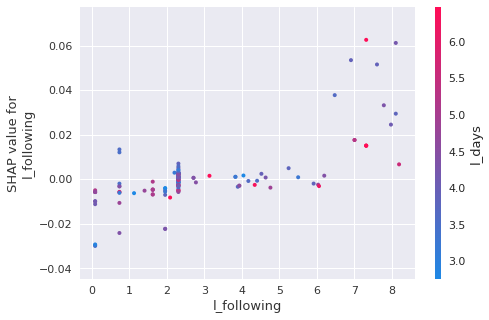

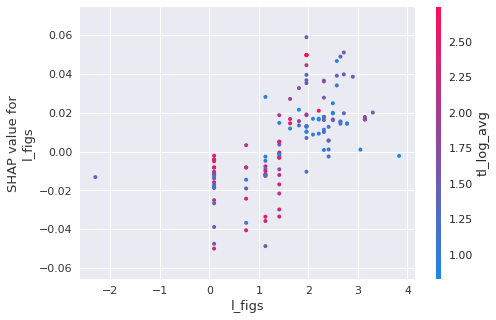

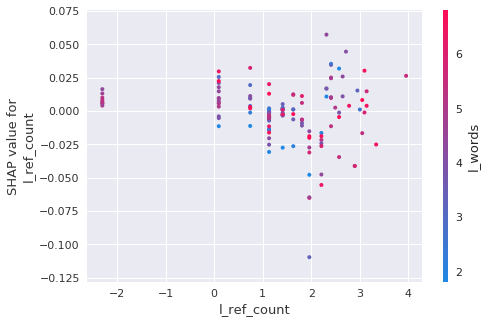

In [227]:
for x in X_new_t.columns:
    shap.dependence_plot(x,shap_values[0],X_new_t)